## KNN

K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression. It's non-parametric and does not involve an explicit training phase. Instead, KNN stores all training data and makes predictions for new data points based on the mode (for classification) or average (for regression) of their k nearest neighbors in the feature space. The choice of distance metric (e.g., Euclidean distance) and the value of k (determined through cross-validation) are crucial for KNN's performance. While simple to understand and implement, KNN can be computationally expensive, particularly for large datasets.

### Data

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=200, n_features=4, random_state=0)
print(X.shape, y.shape)

(200, 4) (200,)


In [3]:
num_samples, num_features = X.shape

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

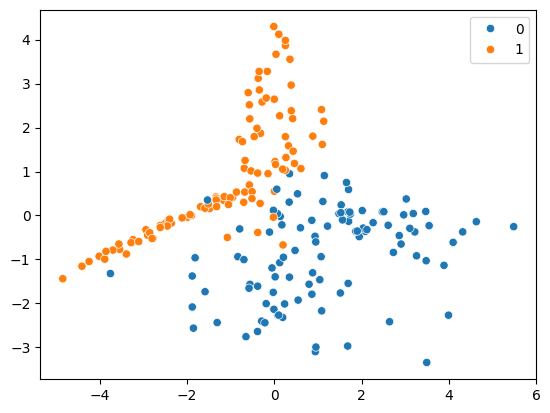

In [5]:
# visualize the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
ax = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y)

### Implementation

In [6]:
import numpy as np
from scipy import stats

np.random.seed(0)

In [7]:
class KNN:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def l2_norm(self, X):
        return np.sqrt(np.sum(np.square(X), -1))

    def euclidean_dist(self, x):
        """Calculate the euclidean distances between x and all data points in X."""
        return self.l2_norm(self.X - x)

    def cosine_similarity(self, x):
        """Calcuate cosine similarity between x and all data points in X"""
        inner_products = self.X @ x.reshape((-1, 1)).squeeze(1)
        return inner_products / (self.l2_norm(self.X) * self.l2_norm(x))

    def train(self, X, y):
        self.X, self.y = X, y

    def predict(self, x):
        if self.distance_metric == "euclidean":
            distances = self.euclidean_dist(x)
        else:
            distances = self.cosine_similarity(x)

        # get the k neareast neighbor
        indices = distances.argsort()[: self.k]

        # predict the mode of the neighbor labels
        return stats.mode(self.y[indices]).mode

### K Selection using a Validation Set

Here, for simplicity, I choose the optimal k value based on the performance (e.g., accuracy for classification or mean squared error for regression) on a single validation set. While this provides a basic assessment, it's important to note that cross-validation would be a more robust approach for selecting the best k, as it helps mitigate the risk of overfitting to a specific validation set.

In [8]:
permutated_indicies = np.random.permutation(num_samples)
train_size = int(num_samples * 0.8)
train_indices, val_indices = (
    permutated_indicies[:train_size],
    permutated_indicies[train_size:],
)

In [9]:
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(X_train.shape, X_val.shape)

(160, 4) (40, 4)


In [10]:
def choose_k(k_max, distance_metric="euclidean"):
    val_accuracies = np.empty(k_max)

    for k in range(1, k_max + 1):
        knn = KNN(k, distance_metric=distance_metric)
        knn.train(X_train, y_train)

        preds = np.empty_like(y_val)

        for i in range(X_val.shape[0]):
            preds[i] = knn.predict(X_val[i])

        val_accuracies[k - 1] = (preds == y_val).mean()
    return val_accuracies

[Text(0.5, 1.0, 'KNN Performance on Validation Set for Different Values of k (Euclidean Distance)'),
 Text(0.5, 0, 'k'),
 Text(0, 0.5, 'Validation accuracy')]

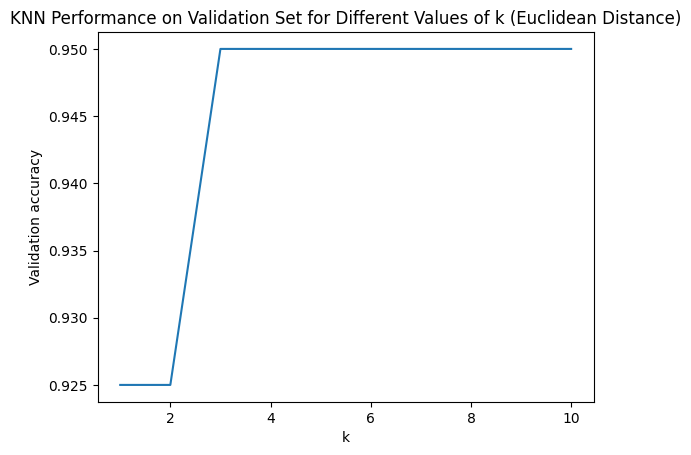

In [11]:
k_max = 10
val_accuracies = choose_k(k_max)
# plot validation accuracies against k
ax = sns.lineplot(x=range(1, k_max + 1), y=val_accuracies)
ax.set(
    title="KNN Performance on Validation Set for Different Values of k (Euclidean Distance)",
    xlabel="k",
    ylabel="Validation accuracy",
)

Choose k = 4 should be reasonable for this example.